#optical Flow

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Q1: optical flow
Data source: sample video from UCF101
Write a program to compute the optical flow for all the pairs of consecutive frames in the video and display the frames and optical flow in subplots.



In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to compute and display optical flow
def compute_optical_flow(video_path):
    # Open video file
    cap = cv2.VideoCapture(video_path)

    # Check if video opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # Read the first frame
    ret, prev_frame = cap.read()

    # Create a subplot with 2 rows and 1 column
    plt.figure(figsize=(10, 5))

    while True:
        # Read the next frame
        ret, next_frame = cap.read()

        # Break the loop if video ends
        if not ret:
            break

        # Convert frames to grayscale
        prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
        next_gray = cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY)

        # Compute optical flow
        flow = cv2.calcOpticalFlowFarneback(prev_gray, next_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

        # Display frames and optical flow in subplots
        plt.subplot(121), plt.imshow(cv2.cvtColor(prev_frame, cv2.COLOR_BGR2RGB))
        plt.title('Frame')
        plt.subplot(122), plt.imshow(flow_display(flow))
        plt.title('Optical Flow')
        plt.show()

        # Update the previous frame
        prev_frame = next_frame

        # Break the loop if 'q' key is pressed
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    # Release the video capture object
    cap.release()

    # Close all windows
    cv2.destroyAllWindows()

# Function to convert optical flow to RGB for display
def flow_display(flow):
    h, w = flow.shape[:2]
    hsv = np.zeros((h, w, 3), dtype=np.uint8)
    hsv[..., 1] = 255

    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    return rgb

# Path to the video file
video_path = '/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment3/v_Basketball_g02_c04.avi'

# Call the function to compute and display optical flow
compute_optical_flow(video_path)


Output hidden; open in https://colab.research.google.com to view.

#Q2: MNIST

#2.(I) MNIST 1Hidden Layer NN

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch 0, Loss: 0.34661759942277093, Train Accuracy: 0.13005357142857144, Validation Loss: 0.3460690802615495, Validation Accuracy: 0.1327142857142857
Epoch 100, Loss: 0.16445325312931305, Train Accuracy: 0.12269642857142857, Validation Loss: 0.1636235758053188, Validation Accuracy: 0.12578571428571428
Epoch 200, Loss: 0.0891525459146978, Train Accuracy: 0.2909285714285714, Validation Loss: 0.08950902946121748, Validation Accuracy: 0.2927142857142857
Epoch 300, Loss: 0.08451900260292204, Train Accuracy: 0.3389464285714286, Validation Loss: 0.08479853191779514, Validation Accuracy: 0.34335714285714286
Epoch 400, Loss: 0.07972553258050054, Train Accuracy: 0.3852857142857143, Validation Loss: 0.07993652906328072, Validation Accuracy: 0.3871428571428571
Epoch 500, Loss: 0.07506762900341221, Train Accuracy: 0.42078571428571426, Validation Loss: 0.07525903305990132, Validation Accuracy: 0.4227142857142857
Epoch 600, Loss: 0.0712844224302715, Train Accuracy: 0.4484642857142857, Validation Loss

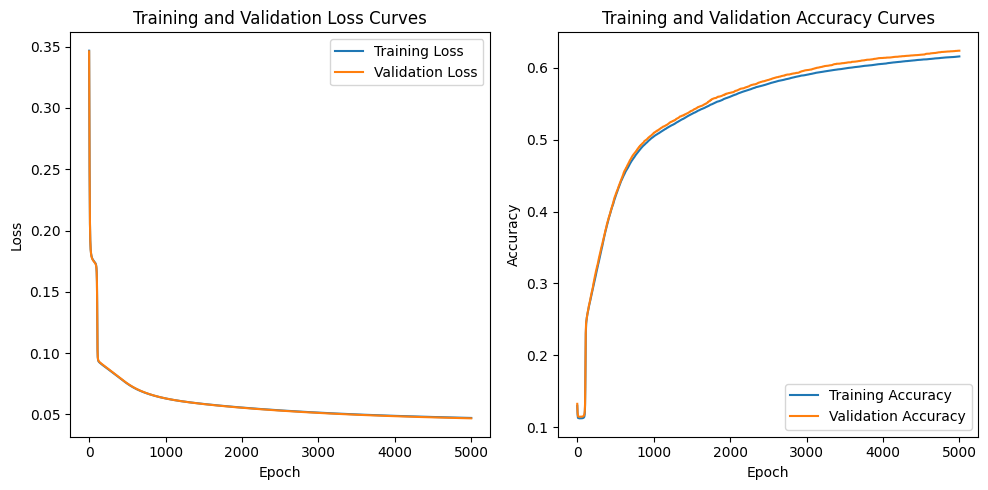

Test Accuracy: 0.6235


In [3]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist.data.astype('float32'), mnist.target.astype('int')

# Normalize the input data
X /= 255.0

# One-hot encode the labels
num_classes = 10
y_onehot = np.zeros((y.shape[0], num_classes))
y_onehot[np.arange(y.shape[0]), y] = 1

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Hyperparameters
input_size = X_train.shape[1]
hidden_size = 64
output_size = num_classes
learning_rate = 0.00001
epochs = 5000

# Initialize weights and biases
np.random.seed(42)
weights_hidden = np.random.randn(input_size, hidden_size)
biases_hidden = np.zeros((1, hidden_size))

weights_output = np.random.randn(hidden_size, output_size)
biases_output = np.zeros((1, output_size))

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Mean Squared Error (MSE) loss function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Lists to store training and validation losses
train_losses = []
validation_losses = []

# Lists to store training and validation accuracies
train_accuracies = []
validation_accuracies = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X_train, weights_hidden) + biases_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_output) + biases_output
    output_layer_output = sigmoid(output_layer_input)

    # Compute training loss and accuracy
    train_loss = mean_squared_error(y_train, output_layer_output)
    train_losses.append(train_loss)

    train_predictions = np.argmax(output_layer_output, axis=1)
    train_accuracy = np.mean(train_predictions == np.argmax(y_train, axis=1))
    train_accuracies.append(train_accuracy)

    # Validation
    hidden_layer_input_val = np.dot(X_test, weights_hidden) + biases_hidden
    hidden_layer_output_val = sigmoid(hidden_layer_input_val)

    output_layer_input_val = np.dot(hidden_layer_output_val, weights_output) + biases_output
    output_layer_output_val = sigmoid(output_layer_input_val)

    # Compute validation loss and accuracy
    validation_loss = mean_squared_error(y_test, output_layer_output_val)
    validation_losses.append(validation_loss)

    val_predictions = np.argmax(output_layer_output_val, axis=1)
    val_accuracy = np.mean(val_predictions == np.argmax(y_test, axis=1))
    validation_accuracies.append(val_accuracy)

    # Backward pass

    # Calculate gradients
    output_error = y_train - output_layer_output
    output_delta = output_error * output_layer_output * (1 - output_layer_output)

    hidden_layer_error = output_delta.dot(weights_output.T)
    hidden_layer_delta = hidden_layer_error * hidden_layer_output * (1 - hidden_layer_output)

    # Update weights and biases
    weights_output += learning_rate * hidden_layer_output.T.dot(output_delta)
    biases_output += learning_rate * np.sum(output_delta, axis=0, keepdims=True)

    weights_hidden += learning_rate * X_train.T.dot(hidden_layer_delta)
    biases_hidden += learning_rate * np.sum(hidden_layer_delta, axis=0, keepdims=True)

    # Print the loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {train_loss}, Train Accuracy: {train_accuracy}, Validation Loss: {validation_loss}, Validation Accuracy: {val_accuracy}")

# Plot the loss curves
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
hidden_layer_input_test = np.dot(X_test, weights_hidden) + biases_hidden
hidden_layer_output_test = sigmoid(hidden_layer_input_test)

output_layer_input_test = np.dot(hidden_layer_output_test, weights_output) + biases_output
output_layer_output_test = sigmoid(output_layer_input_test)

# Convert one-hot encoded predictions to class labels
predictions = np.argmax(output_layer_output_test, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = np.mean(predictions == true_labels)
print(f"Test Accuracy: {accuracy}")


# 2.(II) MNIST Autoencoder

Epoch 1/100, Loss: 0.024090351005395253, Train Accuracy: 0.9759096489946048, Validation Loss: 0.012476234265821094, Validation Accuracy: 0.9875237657341789
Epoch 2/100, Loss: 0.010981109666327635, Train Accuracy: 0.9890188903336724, Validation Loss: 0.010191224297468967, Validation Accuracy: 0.989808775702531
Epoch 3/100, Loss: 0.009980246348927418, Train Accuracy: 0.9900197536510725, Validation Loss: 0.009841112424916726, Validation Accuracy: 0.9901588875750833
Epoch 4/100, Loss: 0.00976152626425028, Train Accuracy: 0.9902384737357497, Validation Loss: 0.009715003560871837, Validation Accuracy: 0.9902849964391282
Epoch 5/100, Loss: 0.009683503789206346, Train Accuracy: 0.9903164962107937, Validation Loss: 0.009702432613344268, Validation Accuracy: 0.9902975673866558
Epoch 6/100, Loss: 0.00962564887603124, Train Accuracy: 0.9903743511239688, Validation Loss: 0.009600311884299871, Validation Accuracy: 0.9903996881157001
Epoch 7/100, Loss: 0.00959675248960654, Train Accuracy: 0.990403247

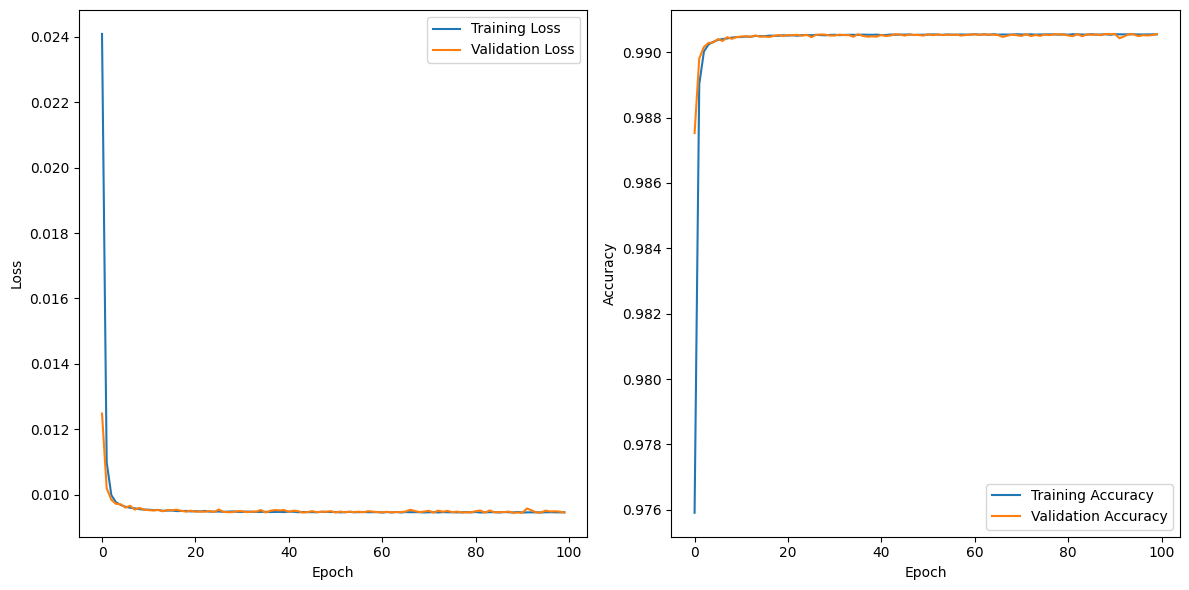

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load MNIST train and test data from CSV files
train_df = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment3/MNIST/mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment3/MNIST/mnist_test.csv')

# Extract features and labels
X_train = train_df.iloc[:, 1:].values.astype('float32')
y_train = train_df.iloc[:, 0].values.astype('int')

X_test = test_df.values.astype('float32')

# Normalize the input data
X_train /= 255.0
X_test /= 255.0

# One-hot encode the labels
num_classes = 10
y_train_onehot = np.zeros((y_train.shape[0], num_classes))
y_train_onehot[np.arange(y_train.shape[0]), y_train] = 1

# Split the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train_onehot, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_valid_tensor = torch.tensor(X_valid)
y_valid_tensor = torch.tensor(y_valid, dtype=torch.float32)

# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.Tanh()
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_size, input_size),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Hyperparameters
input_size = X_train.shape[1]
hidden_size = 64
batch_size = 64
learning_rate = 0.001
epochs = 100

# Create DataLoader for training and validation sets
train_dataset = TensorDataset(X_train_tensor, X_train_tensor)  # Using X_train_tensor as both input and target for autoencoder
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

valid_dataset = TensorDataset(X_valid_tensor, X_valid_tensor)  # Using X_valid_tensor as both input and target for autoencoder
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# Initialize the autoencoder model
autoencoder = Autoencoder(input_size, hidden_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)

# Lists to store training and validation losses and accuracies
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

# Training loop
for epoch in range(epochs):
    epoch_train_loss = 0.0  # Initialize training loss for the epoch
    for data, _ in train_loader:  # Use '_' since we are using the same data as both input and target
        data = data.view(data.size(0), -1)  # Flatten the input images
        optimizer.zero_grad()  # Zero the gradients

        # Forward pass
        outputs = autoencoder(data)

        # Compute the loss
        loss = criterion(outputs, data)

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

        epoch_train_loss += loss.item()  # Accumulate loss for the epoch

    # Compute training accuracy
    with torch.no_grad():
        autoencoder.eval()
        train_predictions = autoencoder(X_train_tensor).detach().numpy()
        train_accuracy = 1 - epoch_train_loss / len(train_loader)
        train_accuracies.append(train_accuracy)

        # Compute validation loss and accuracy
        valid_loss = 0.0
        for data, _ in valid_loader:  # Use '_' since we are using the same data as both input and target
            data = data.view(data.size(0), -1)  # Flatten the input images
            outputs = autoencoder(data)
            valid_loss += criterion(outputs, data).item()

        valid_loss /= len(valid_loader)
        valid_losses.append(valid_loss)

        valid_accuracy = 1 - valid_loss
        valid_accuracies.append(valid_accuracy)

        autoencoder.train()

    # Print the loss and accuracy for every epoch
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_train_loss / len(train_loader)}, Train Accuracy: {train_accuracy}, Validation Loss: {valid_loss}, Validation Accuracy: {valid_accuracy}")

    # Record training loss for the epoch
    train_losses.append(epoch_train_loss / len(train_loader))

# Save the trained model weights
torch.save(autoencoder.state_dict(), '/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment3/autoencoder_weights.pth')

# Plot the training and validation loss curves
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(valid_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [48]:
print(X_test.shape)


(10000, 785)


In [49]:
# Load the trained model weights
autoencoder.load_state_dict(torch.load('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment3/autoencoder_weights.pth'))

# Exclude the additional feature and reshape the test data to match the input size expected by the autoencoder
X_test_reshaped = X_test[:, 1:].reshape(-1, 28 * 28)

# Create DataLoader for the test set
test_dataset = TensorDataset(torch.tensor(X_test_reshaped), torch.tensor(X_test_reshaped))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Evaluate test accuracy
test_loss = 0.0
autoencoder.eval()
for data, _ in test_loader:
    data = data.view(data.size(0), -1)
    outputs = autoencoder(data)
    test_loss += criterion(outputs, data).item()

test_loss /= len(test_loader)
test_accuracy = 1 - test_loss

print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Test Loss: 0.00917677943458318, Test Accuracy: 0.9908232205654168


#2.(III) MLP

Epoch [1/100], Train Loss: 2.2925, Valid Loss: 2.2675, Train Accuracy: 0.1345, Valid Accuracy: 0.2213
Epoch [2/100], Train Loss: 2.2483, Valid Loss: 2.2304, Train Accuracy: 0.2972, Valid Accuracy: 0.3523
Epoch [3/100], Train Loss: 2.2089, Valid Loss: 2.1883, Train Accuracy: 0.4319, Valid Accuracy: 0.4427
Epoch [4/100], Train Loss: 2.1629, Valid Loss: 2.1384, Train Accuracy: 0.4941, Valid Accuracy: 0.5242
Epoch [5/100], Train Loss: 2.1080, Valid Loss: 2.0790, Train Accuracy: 0.5462, Valid Accuracy: 0.5587
Epoch [6/100], Train Loss: 2.0432, Valid Loss: 2.0093, Train Accuracy: 0.5745, Valid Accuracy: 0.5957
Epoch [7/100], Train Loss: 1.9681, Valid Loss: 1.9296, Train Accuracy: 0.6019, Valid Accuracy: 0.6196
Epoch [8/100], Train Loss: 1.8842, Valid Loss: 1.8421, Train Accuracy: 0.6279, Valid Accuracy: 0.6278
Epoch [9/100], Train Loss: 1.7939, Valid Loss: 1.7497, Train Accuracy: 0.6404, Valid Accuracy: 0.6570
Epoch [10/100], Train Loss: 1.7004, Valid Loss: 1.6556, Train Accuracy: 0.6625, Va

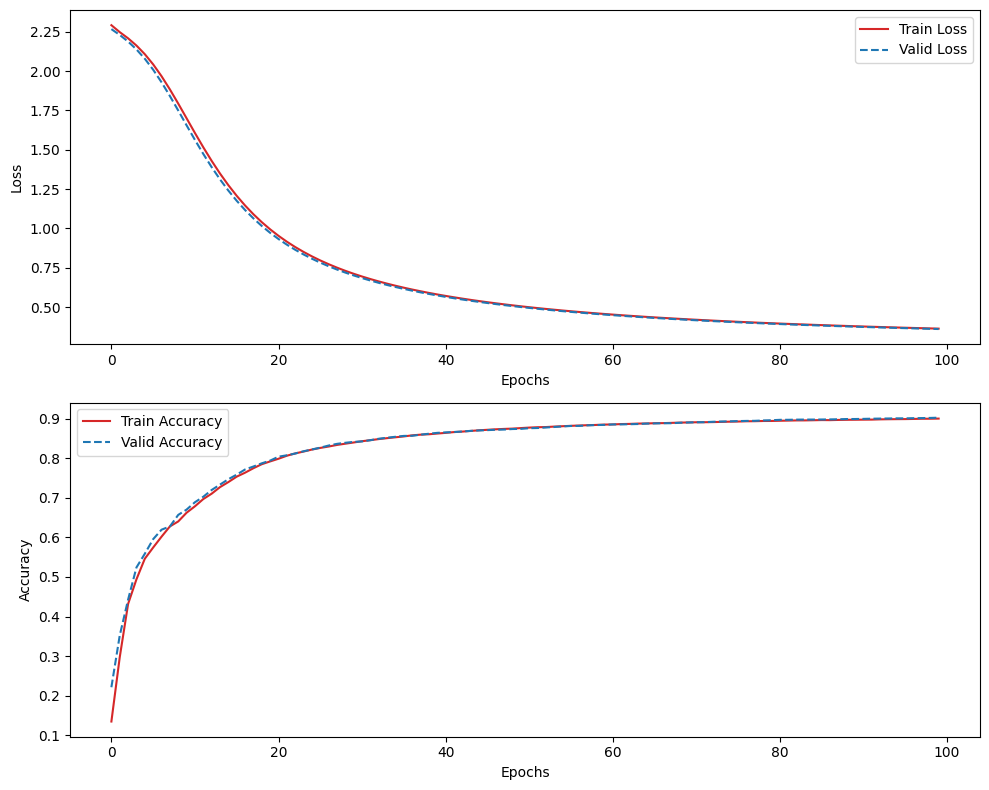

Test Accuracy: 0.9047


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define the 3-layer MLP model
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPModel, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = self.sigmoid(x)
        x = self.layer2(x)
        return x

# Define the training function with accuracy calculation
def train(model, criterion, optimizer, train_loader, valid_loader, num_epochs=10):
    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train += targets.size(0)
            correct_train += (predicted == targets).sum().item()

        # Calculate average training loss and accuracy for the epoch
        avg_train_loss = train_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)

        # Validate the model
        model.eval()
        valid_loss = 0.0
        correct_valid = 0
        total_valid = 0

        with torch.no_grad():
            for inputs, targets in valid_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                valid_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total_valid += targets.size(0)
                correct_valid += (predicted == targets).sum().item()

        # Calculate average validation loss and accuracy for the epoch
        avg_valid_loss = valid_loss / len(valid_loader)
        valid_accuracy = correct_valid / total_valid
        valid_losses.append(avg_valid_loss)
        valid_accuracies.append(valid_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Valid Loss: {avg_valid_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Valid Accuracy: {valid_accuracy:.4f}')

    return train_losses, valid_losses, train_accuracies, valid_accuracies

# Function to plot the training and validation curves including accuracy
def plot_curves(train_losses, valid_losses, train_accuracies, valid_accuracies):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot losses
    ax1.plot(train_losses, label='Train Loss', color='tab:red')
    ax1.plot(valid_losses, label='Valid Loss', linestyle='dashed', color='tab:blue')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot accuracies
    ax2.plot(train_accuracies, label='Train Accuracy', color='tab:red')
    ax2.plot(valid_accuracies, label='Valid Accuracy', linestyle='dashed', color='tab:blue')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Load MNIST train and test data
train_df = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment3/MNIST/mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment3/MNIST/mnist_test.csv')

# Assuming the first column is the label and the rest are pixel values
train_labels = train_df.iloc[:, 0].values
train_images = train_df.iloc[:, 1:].values / 255.0  # Normalize pixel values to the range [0, 1]

test_labels = test_df.iloc[:, 0].values
test_images = test_df.iloc[:, 1:].values / 255.0  # Normalize pixel values to the range [0, 1]

# Split the train data into train and validation sets
train_images, valid_images, train_labels, valid_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Convert data to PyTorch tensors
train_data = torch.tensor(train_images, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)

valid_data = torch.tensor(valid_images, dtype=torch.float32)
valid_labels = torch.tensor(valid_labels, dtype=torch.long)

test_data = torch.tensor(test_images, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Create custom datasets
class MNISTDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Create DataLoader objects
batch_size = 32

train_dataset = MNISTDataset(train_data, train_labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

valid_dataset = MNISTDataset(valid_data, valid_labels)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

test_dataset = MNISTDataset(test_data, test_labels)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the model, loss function, and optimizer
input_size = 784
hidden_size = 64
output_size = 10

model = MLPModel(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Train the model
train_losses, valid_losses, train_accuracies, valid_accuracies = train(model, criterion, optimizer, train_loader, valid_loader, num_epochs=100)

# Plot the training and validation curves including accuracy
plot_curves(train_losses, valid_losses, train_accuracies, valid_accuracies)

# Test the model on the test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')


#2.(IV) PreTrained

Epoch [1/100], Train Loss: 5.8298, Valid Loss: 4.4220, Train Accuracy: 0.0175, Valid Accuracy: 0.1102
Epoch [2/100], Train Loss: 3.2891, Valid Loss: 2.6484, Train Accuracy: 0.1129, Valid Accuracy: 0.1102
Epoch [3/100], Train Loss: 2.5008, Valid Loss: 2.4195, Train Accuracy: 0.1525, Valid Accuracy: 0.1102
Epoch [4/100], Train Loss: 2.3857, Valid Loss: 2.3624, Train Accuracy: 0.1588, Valid Accuracy: 0.2692
Epoch [5/100], Train Loss: 2.3474, Valid Loss: 2.3364, Train Accuracy: 0.2050, Valid Accuracy: 0.1387
Epoch [6/100], Train Loss: 2.3268, Valid Loss: 2.3199, Train Accuracy: 0.2461, Valid Accuracy: 0.2098
Epoch [7/100], Train Loss: 2.3122, Valid Loss: 2.3062, Train Accuracy: 0.3100, Valid Accuracy: 0.2157
Epoch [8/100], Train Loss: 2.2992, Valid Loss: 2.2936, Train Accuracy: 0.3114, Valid Accuracy: 0.3005
Epoch [9/100], Train Loss: 2.2863, Valid Loss: 2.2798, Train Accuracy: 0.3423, Valid Accuracy: 0.4375
Epoch [10/100], Train Loss: 2.2715, Valid Loss: 2.2639, Train Accuracy: 0.4526, Va

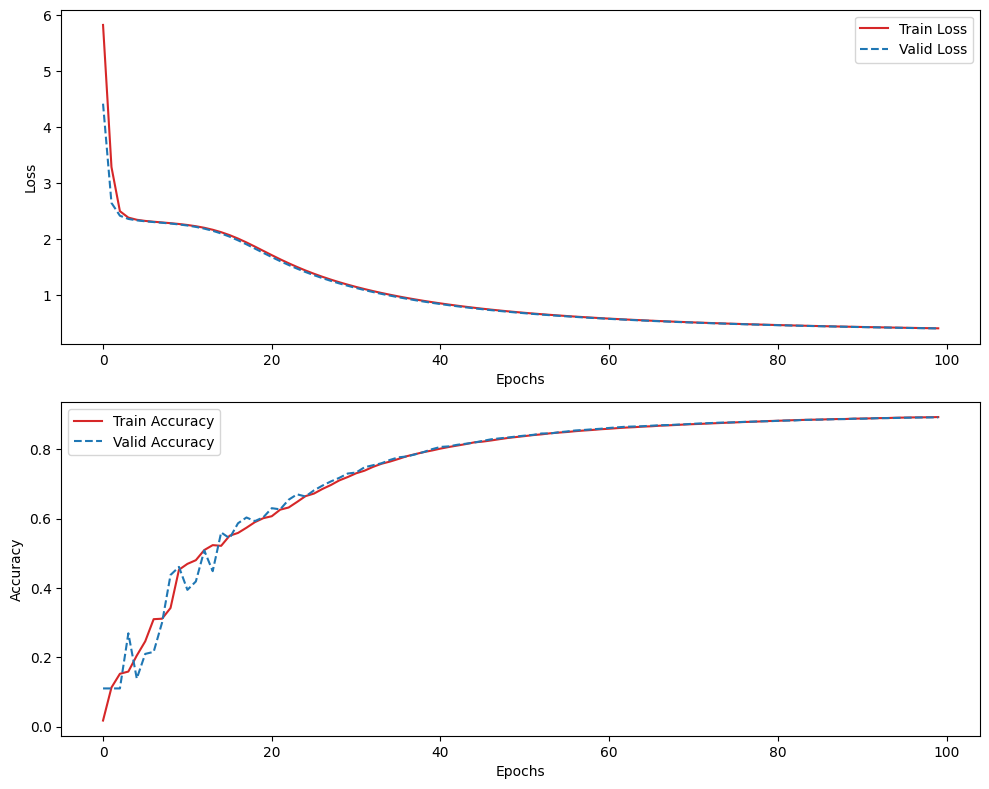

Test Accuracy: 0.8965


In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch.nn.init as init

# Define the 3-layer MLP model with weight initialization
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, autoencoder_weights):
        super(MLPModel, self).__init__()

        # Define the first layer with pretrained weights
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer1.weight.data = autoencoder_weights['encoder.0.weight']
        self.layer1.bias.data = autoencoder_weights['encoder.0.bias']

        self.sigmoid = nn.Sigmoid()

        # Define the second layer with pretrained weights
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.layer2.weight.data = autoencoder_weights['decoder.0.weight']
        self.layer2.bias.data = autoencoder_weights['decoder.0.bias']

    def forward(self, x):
        x = self.layer1(x)
        x = self.sigmoid(x)
        x = self.layer2(x)
        return x

# Define the training function with accuracy calculation
def train(model, criterion, optimizer, train_loader, valid_loader, num_epochs=10):
    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train += targets.size(0)
            correct_train += (predicted == targets).sum().item()

        # Calculate average training loss and accuracy for the epoch
        avg_train_loss = train_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)

        # Validate the model
        model.eval()
        valid_loss = 0.0
        correct_valid = 0
        total_valid = 0

        with torch.no_grad():
            for inputs, targets in valid_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                valid_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total_valid += targets.size(0)
                correct_valid += (predicted == targets).sum().item()

        # Calculate average validation loss and accuracy for the epoch
        avg_valid_loss = valid_loss / len(valid_loader)
        valid_accuracy = correct_valid / total_valid
        valid_losses.append(avg_valid_loss)
        valid_accuracies.append(valid_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Valid Loss: {avg_valid_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Valid Accuracy: {valid_accuracy:.4f}')

    return train_losses, valid_losses, train_accuracies, valid_accuracies

# Function to plot the training and validation curves including accuracy
def plot_curves(train_losses, valid_losses, train_accuracies, valid_accuracies):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot losses
    ax1.plot(train_losses, label='Train Loss', color='tab:red')
    ax1.plot(valid_losses, label='Valid Loss', linestyle='dashed', color='tab:blue')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot accuracies
    ax2.plot(train_accuracies, label='Train Accuracy', color='tab:red')
    ax2.plot(valid_accuracies, label='Valid Accuracy', linestyle='dashed', color='tab:blue')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Load MNIST train and test data
train_df = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment3/MNIST/mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment3/MNIST/mnist_test.csv')

# Assuming the first column is the label and the rest are pixel values
train_labels = train_df.iloc[:, 0].values
train_images = train_df.iloc[:, 1:].values / 255.0  # Normalize pixel values to the range [0, 1]

test_labels = test_df.iloc[:, 0].values
test_images = test_df.iloc[:, 1:].values / 255.0  # Normalize pixel values to the range [0, 1]

# Split the train data into train and validation sets
train_images, valid_images, train_labels, valid_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Convert data to PyTorch tensors
train_data = torch.tensor(train_images, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)

valid_data = torch.tensor(valid_images, dtype=torch.float32)
valid_labels = torch.tensor(valid_labels, dtype=torch.long)

test_data = torch.tensor(test_images, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Create custom datasets
class MNISTDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Create DataLoader objects
batch_size = 32

train_dataset = MNISTDataset(train_data, train_labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

valid_dataset = MNISTDataset(valid_data, valid_labels)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

test_dataset = MNISTDataset(test_data, test_labels)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Set random seed for reproducibility
torch.manual_seed(42)

# Load pretrained autoencoder weights
autoencoder_weights = torch.load('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment3/autoencoder_weights.pth')

# Define the model, loss function, and optimizer
input_size = 784
hidden_size = 64
output_size = 10

model = MLPModel(input_size, hidden_size, output_size, autoencoder_weights)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Train the model
train_losses, valid_losses, train_accuracies, valid_accuracies = train(model, criterion, optimizer, train_loader, valid_loader, num_epochs=100)

# Plot the training and validation curves including accuracy
plot_curves(train_losses, valid_losses, train_accuracies, valid_accuracies)

# Test the model on the test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')


#2.(V) LeNet

Epoch [1/100], Train Loss: 2.3008, Valid Loss: 2.2976, Train Accuracy: 0.0989, Valid Accuracy: 0.0979
Epoch [2/100], Train Loss: 2.2931, Valid Loss: 2.2883, Train Accuracy: 0.0991, Valid Accuracy: 0.1000
Epoch [3/100], Train Loss: 2.2790, Valid Loss: 2.2679, Train Accuracy: 0.1980, Valid Accuracy: 0.3545
Epoch [4/100], Train Loss: 2.2399, Valid Loss: 2.1957, Train Accuracy: 0.4516, Valid Accuracy: 0.4783
Epoch [5/100], Train Loss: 1.9886, Valid Loss: 1.5298, Train Accuracy: 0.5435, Valid Accuracy: 0.6643
Epoch [6/100], Train Loss: 0.9599, Valid Loss: 0.6559, Train Accuracy: 0.7538, Valid Accuracy: 0.8057
Epoch [7/100], Train Loss: 0.5635, Valid Loss: 0.4853, Train Accuracy: 0.8349, Valid Accuracy: 0.8612
Epoch [8/100], Train Loss: 0.4472, Valid Loss: 0.4043, Train Accuracy: 0.8680, Valid Accuracy: 0.8811
Epoch [9/100], Train Loss: 0.3835, Valid Loss: 0.3505, Train Accuracy: 0.8872, Valid Accuracy: 0.8963
Epoch [10/100], Train Loss: 0.3395, Valid Loss: 0.3199, Train Accuracy: 0.9012, Va

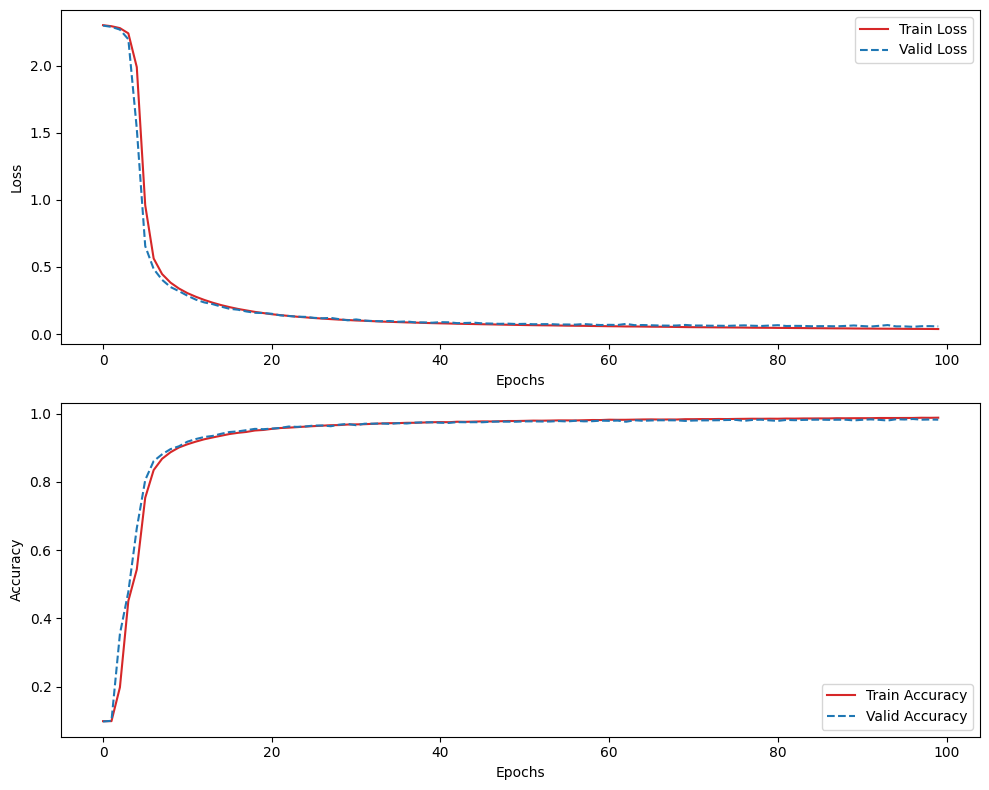

Test Accuracy: 0.9849


In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define the LeNet model
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(16, 120, kernel_size=5, stride=1, padding=0)
        self.relu3 = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)
        return x

# Define the training function with accuracy calculation
def train(model, criterion, optimizer, train_loader, valid_loader, num_epochs=10):
    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train += targets.size(0)
            correct_train += (predicted == targets).sum().item()

        # Calculate average training loss and accuracy for the epoch
        avg_train_loss = train_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)

        # Validate the model
        model.eval()
        valid_loss = 0.0
        correct_valid = 0
        total_valid = 0

        with torch.no_grad():
            for inputs, targets in valid_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                valid_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total_valid += targets.size(0)
                correct_valid += (predicted == targets).sum().item()

        # Calculate average validation loss and accuracy for the epoch
        avg_valid_loss = valid_loss / len(valid_loader)
        valid_accuracy = correct_valid / total_valid
        valid_losses.append(avg_valid_loss)
        valid_accuracies.append(valid_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Valid Loss: {avg_valid_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Valid Accuracy: {valid_accuracy:.4f}')

    return train_losses, valid_losses, train_accuracies, valid_accuracies

# Function to plot the training and validation curves including accuracy
def plot_curves(train_losses, valid_losses, train_accuracies, valid_accuracies):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot losses
    ax1.plot(train_losses, label='Train Loss', color='tab:red')
    ax1.plot(valid_losses, label='Valid Loss', linestyle='dashed', color='tab:blue')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot accuracies
    ax2.plot(train_accuracies, label='Train Accuracy', color='tab:red')
    ax2.plot(valid_accuracies, label='Valid Accuracy', linestyle='dashed', color='tab:blue')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Load MNIST train and test data
train_df = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment3/MNIST/mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment3/MNIST/mnist_test.csv')

# Assuming the first column is the label and the rest are pixel values
train_labels = train_df.iloc[:, 0].values
train_images = train_df.iloc[:, 1:].values / 255.0  # Normalize pixel values to the range [0, 1]

test_labels = test_df.iloc[:, 0].values
test_images = test_df.iloc[:, 1:].values / 255.0  # Normalize pixel values to the range [0, 1]

# Reshape images to (batch_size, channels, height, width)
train_images = train_images.reshape(-1, 1, 28, 28)
test_images = test_images.reshape(-1, 1, 28, 28)

# Split the train data into train and validation sets
train_images, valid_images, train_labels, valid_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Convert data to PyTorch tensors
train_data = torch.tensor(train_images, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)

valid_data = torch.tensor(valid_images, dtype=torch.float32)
valid_labels = torch.tensor(valid_labels, dtype=torch.long)

test_data = torch.tensor(test_images, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Create custom datasets
class MNISTDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Create DataLoader objects
batch_size = 32

train_dataset = MNISTDataset(train_data, train_labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

valid_dataset = MNISTDataset(valid_data, valid_labels)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

test_dataset = MNISTDataset(test_data, test_labels)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the model, loss function, and optimizer
model = LeNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Train the model
train_losses, valid_losses, train_accuracies, valid_accuracies = train(model, criterion, optimizer, train_loader, valid_loader, num_epochs=100)

# Plot the training and validation curves including accuracy
plot_curves(train_losses, valid_losses, train_accuracies, valid_accuracies)

# Test the model on the test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')
